In [1]:
import pandas as pd
import seaborn as sns
import patsy
import networkx as nx
from networkx.readwrite.graphml import read_graphml
from networkx.algorithms.shortest_paths.generic import shortest_path_length
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm

## Graphml file for Fig. 3 

In [39]:
mus_l = []
for aa,pt in enumerate(['KO','OE']):
    for bb,srt in enumerate(['inv','so']):
        results = pd.read_csv("./results/df_neg2_pre_noNA_%s_%s.csv" % (pt,srt),index_col=0)
        ## load the state (oe/kd) frequencies
        states = pd.read_csv("./results/states_neg2_pre_%s_%s.csv" % (pt,srt),index_col=0)
        ## The MultiIndex allows us to easily take a statistics over a fixed value of the parameters.
        results.index = pd.MultiIndex.from_tuples([e.split('-') for e in results.index])
        states.index = pd.MultiIndex.from_tuples([e.split('-') for e in states.index])
        ## With the multiindex and groupby functionality, 
        ## we can condense the "weighted_mean" functions into a single line
        mus_l.append(((results*states).groupby(level=0).sum()/states.groupby(level=0).sum()).mean(axis=0))
        
ovr_avg = pd.concat(mus_l,axis=1).mean(axis=1).sort_values(ascending=False)   
ovr_avg = dict(ovr_avg)
G_rs2 = nx.read_gml('./networks/rs2.gml')
nodes_rs2 = list(G_rs2.nodes())
nodes_all = list(ovr_avg.keys())
irr_all = list(ovr_avg.values())
for i in nodes_rs2:
    if i not in nodes_all:
        nodes_all.append(i)
        irr_all.append(0)
overall = dict(zip(nodes_all,irr_all))

nx.set_node_attributes(G_rs2, dict(zip(list(ovr_avg.keys()),np.log10(list(ovr_avg.values())))), 'logIrrFreq2')
nx.set_node_attributes(G_rs2, dict(zip(nodes_all,nodes_all)), 'name')
nx.write_gml(G_rs2, './networks/rs2_irr_neg2_new.gml') 
nx.write_graphml(G_rs2, './networks/rs2_irr_neg2_new.graphml') 

In [15]:
((results*states).groupby(level=0).sum()/states.groupby(level=0).sum())

,crp,hns,fnr,fis,rcsB,arcA,fur,cra,phoB,soxS,...,xylR,mazE,uxuR,galS,exuR,mazF,cspA,flhD,flhC,dcuR
0,0.932901,0.530055,0.343966,0.379808,0.165278,0.171781,0.266915,0.632243,0.686177,0.168920,...,0.000000,0.000000,0.285662,0.125523,0.070522,0.000000,0.011628,0.000000,0.035978,0.000000
0.2,0.974801,0.637679,0.583570,0.372870,0.390026,0.160327,0.183919,0.617028,0.732208,0.107415,...,0.150943,0.000000,0.197775,0.677352,0.080694,0.000000,0.000228,0.016129,0.000000,0.151801
0.4,0.867104,0.000000,0.409314,0.000000,0.164677,0.100905,0.321673,0.361365,0.762571,0.000000,...,0.000000,0.000000,0.094176,0.029403,0.033251,0.000000,0.000000,NaN,0.000000,0.000000
0.6,0.998247,0.569598,0.469002,0.380589,0.371408,0.206373,0.394050,0.407752,0.699678,0.000000,...,0.000000,0.242195,0.246083,0.616667,0.112036,0.242195,0.239497,0.000000,0.000000,0.000000
0.8,0.911379,0.000000,0.235421,0.082938,0.199275,0.110659,0.000000,0.396684,0.767525,0.000000,...,NaN,NaN,0.394349,0.174292,0.075895,0.000000,0.000000,0.000000,0.000000,0.000000
1,NaN,NaN,0.000000,NaN,0.500000,0.000000,NaN,0.000000,0.750000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


## Fig. 4

C:\Users\gris_\AppData\Local\Temp\ipykernel_28188\2592031394.py:59: RuntimeWarning: invalid value encountered in true_divide
  mean = np.sum(weighted_data[i*exp:(i+1)*exp,:],axis=0)/np.sum(states[i*exp:(i+1)*exp,:],axis=0)
C:\Users\gris_\anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\gris_\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\gris_\AppData\Local\Temp\ipykernel_28188\2592031394.py:59: RuntimeWarning: invalid value encountered in true_divide
  mean = np.sum(weighted_data[i*exp:(i+1)*exp,:],axis=0)/np.sum(states[i*exp:(i+1)*exp,:],axis=0)
C:\Users\gris_\anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\gris_\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:

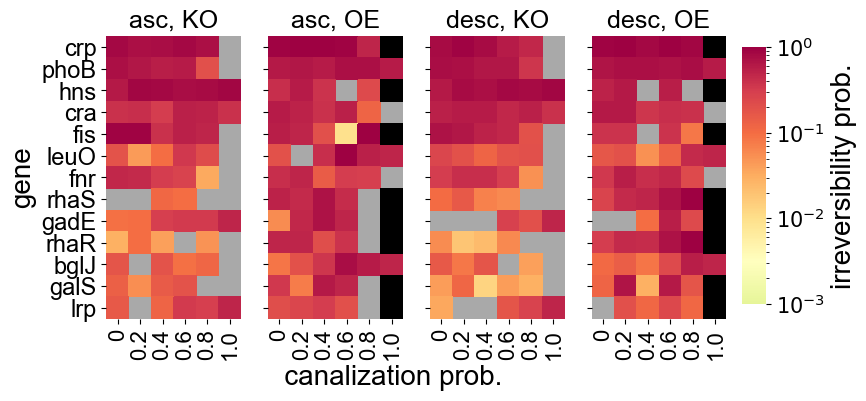

In [37]:
import cmasher as cmr
from matplotlib.patches import Patch
import matplotlib.colors as mcolors


irr_nodes = set()

f, axarr = plt.subplots(1,4, sharex=True, sharey=True,figsize=(8,3.67),facecolor='white')
sns.color_palette("coolwarm_r")


names = ['KO_inv','OE_inv','KO_so','OE_so']
titles = ['asc, KO','asc, OE','desc, KO','desc, OE']
cbs = [False,False,False,False,True]
cbar_ax = f.add_axes([.92, .15, .03, .7])

for n in range(4):
    name = names[n]
    results = pd.read_csv("./results/df_neg2_pre_noNA_"+name+".csv",index_col=0)
    states = pd.read_csv("./results/states_neg2_pre_"+name+".csv",index_col=0)
    nodes = set(list(results.columns))
    irr_nodes = irr_nodes | nodes
irr_nodes = list(dict(ovr_avg).keys())

def get_element_index(ob_list, word_list):
    idx_list = []
    for word in word_list:
        idx = [i for (i, v) in enumerate(ob_list) if v == word]
        idx_list+=idx
    idx_list = list(idx_list)
    idx_list = np.array(list(idx_list))
    return idx_list
def mean_per_realization(data,num_para,exp):
    means = []
    for i in range(num_para):
        data_i = data[i*exp:(i+1)*exp,:]
        data_i = np.ma.masked_array(data_i,[data_i<0])
        mean = np.mean(data_i,axis=0)
        means.append(mean)
    means.append(data[-1,:])
    means = np.array(means)
    return means

def set_na(floatdf,nadf,num_para,exp):
    
    for i in range(num_para):
        for j in range(10):
            mean = np.mean(data[i*exp:(i+1)*exp,:],axis=0)
            means.append(mean)
    means.append(data[-1,:])
    means = np.array(means)
    return means
def weighted_mean(data,states,num_para,exp):
    means = []
    weighted_data = data*states
    for i in range(num_para):
        mean = np.sum(weighted_data[i*exp:(i+1)*exp,:],axis=0)/np.sum(states[i*exp:(i+1)*exp,:],axis=0)
        means.append(mean)
    means.append(weighted_data[-1,:])
    means = np.array(means)
    return means
def num_irr_per_p(data01,num_para):
    nums = []
    data_0101 = data01.copy()
    data_0101[data_0101 > 0] = 1
    for i in range(num_para):
        num = np.sum(data_0101[i,:])
        nums.append(num)
    plt.title('inv')
    plt.xlabel('canalization prob')
    plt.ylabel('num irr nodes')
    
    plt.plot(exps,nums)
    plt.savefig('num_irr_inv.png',dpi=300)
    plt.show()    
    

all_mean = []
for n in range(4):
    name = names[n]
    results = pd.read_csv("./results/df_neg2_pre_noNA_"+name+".csv",index_col=0)
    states = pd.read_csv("./results/states_neg2_pre_"+name+".csv",index_col=0)
    nodes = list(results.columns)
    exps = [0,0.2,0.4,0.6,0.8,1.0]
    
    data = np.array(results.values)
    states = np.array(states.values)
    data_01 = results.copy()
    data[states==0] = -0.0001
        
    mean_float = weighted_mean(data,states,5,10).T
    mean_NA = mean_per_realization(data,5,10).T
    mean_float[mean_NA<-0.0000999] = -0.0001
    
    for i in irr_nodes:
        if i not in nodes:
            mean_float = np.append(mean_float, values=[[0,0,0,0,0,0]], axis=0)
            nodes.append(i)
    
    correct_idx = get_element_index(nodes,irr_nodes)
    mean_float = mean_float[correct_idx,:]
    all_mean.append(mean_float)
    
    df_float = pd.DataFrame(mean_float[:13,:],columns=exps,index=irr_nodes[:13])
    log_norm = LogNorm(vmin=0.001, vmax=1)
    cmap = cmr.get_sub_cmap('Spectral_r', 0.4, 1)
   
    ax = sns.heatmap(df_float,mask=(df_float==0),cbar=True,xticklabels=True, yticklabels=True, norm=log_norm, cbar_kws={"ticks":[1e-3,1e-2,1e-1,1],'label':'irriversibility prob.'},vmin = 0.001, vmax=1,ax=axarr[n],cbar_ax=cbar_ax,cmap=cmap)
    sns.heatmap(df_float, cmap=ListedColormap(['k']), cbar=False, mask=(df_float >=0),ax=ax)
    axarr[n].set_title(titles[n],font = 'Arial',fontsize=18)
    axarr[n].set_facecolor("darkgrey")
    axarr[n].set_xticklabels(exps,font = 'Arial',fontsize=16,rotation=90)
    axarr[n].set_yticklabels(irr_nodes[:13],font = 'Arial',fontsize=17)
    
    axarr[1].set_xlabel('               canalization prob.',font = 'Arial',fontsize=20)
    axarr[0].set_ylabel('gene',font = 'Arial',fontsize=20)
    
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)
cax.set_ylabel('irreversibility prob.',font = 'Arial',fontsize=20)


    #num_irr_per_p(mean_01,6)

f.subplots_adjust(hspace=0)

for ax in axarr:
    ax.label_outer()
    
f.savefig('./figs/fig4.svg',dpi=1200)


## Fig. 5

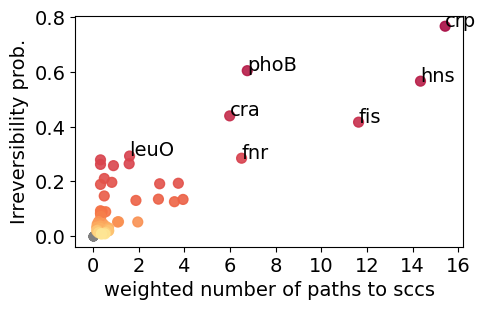

In [40]:

def path_weight(G,path):
    weight = 1
    for node in path[1:]:
        weight *= 1/G.in_degree(node)
    return weight

def path_sign(G,path):
    sign = 1
    for i in range(len(path)-1):
        edge = (path[i],path[i+1])
        sign *= G.get_edge_data(edge[0],edge[1])['weight']
    return sign

#print(list(nx.all_simple_paths(G,'crp','ptsG')))
effect = 0
for path in list(nx.all_simple_paths(G,'crp','ptsG')):
    
    weight = path_weight(G,path)
    sign = path_sign(G,path)
    
    effect += weight*sign
def num_scc_weighted(G,group):
    sccs = list(nx.strongly_connected_components(G))
    num_edge_scc = []
    for n in group:  
        num_edge = 0
        for s in sccs:
            if len(s) == 1 and list(G_rs2.out_edges(list(s)[0],data=True))[0][2]['weight'] == -1:
                continue
            if set(n) != s:
                for n_s in s:
                    if n_s != n:
                        try:
                            length=nx.shortest_path_length(G,source=n,target=n_s)
                            if length == 0:
                                shortest_paths = list(nx.shortest_simple_paths(G,source=n,target=n_s))
                                if len(shortest_paths) != 1:
                                    length = len(shortest_paths[1])
                                else:
                                    continue

                            if length <= max_length:
                                num_edge += 1/length
                                if length == 0:
                                    print(n,n_s)
                                break


                        except nx.NetworkXNoPath:
                            continue
        
        num_edge_scc.append(num_edge)
        
    return num_edge_scc
def num_path_scc_weighted(G,group):
    sccs = list(nx.strongly_connected_components(G))
    num_edge_scc = []
    for n in group:  
        num_edge = 0
        for s in sccs:
            if len(s) == 1 and list(G_rs2.out_edges(list(s)[0],data=True))[0][2]['weight'] == -1:
                continue
            if set(n) != s:
                for n_s in s:
                    if n_s != n:
                        try:
                            paths = list(nx.all_simple_paths(G, n, n_s, cutoff=max_length))
                            
                            for path in paths:

                                weight = path_weight(G,path)
                                sign = path_sign(G,path)

                                num_edge += abs(weight*sign)
                        except nx.NetworkXNoPath:
                            continue
        num_edge_scc.append(abs(num_edge))
    return num_edge_scc  
G_rs2 = nx.read_gml('./networks/rs2.gml')
max_length = 4
nodes = [i for i in overall.keys()]
irr_nodes = nodes
overall = np.array([i[1] for i in overall.items()])

pos_value = overall[:51]
pos_nodes = nodes[:51]

zero_value = overall[51:]
zero_nodes = nodes[51:]

#reached_scc = num_reached_scc(G_rs2,nodes,cutoff)
path_scc_pos = num_path_scc_weighted(G_rs2,pos_nodes)
path_scc_zero = num_path_scc_weighted(G_rs2,zero_nodes)

#scc = num_scc(G_rs2,nodes,cutoff)

plt.figure(figsize=(5,3))
plt.scatter(path_scc_zero,zero_value,c='grey', alpha=0.5)
plt.scatter(path_scc_pos,pos_value,c=np.log10(pos_value),vmin = -5, vmax=0, cmap = 'Spectral_r', alpha=0.9,s=50)
plt.xlabel('weighted number of paths to sccs',fontsize=14)
plt.ylabel('Irreversibility prob.',fontsize=14)
plt.xticks(fontsize=14 )
plt.yticks(fontsize=14 )
for i,txt in zip(get_element_index(nodes, irr_nodes[:7]),irr_nodes[:7]):
     plt.annotate(txt,(path_scc_pos[i],pos_value[i]),fontsize=14)
plt.savefig('./figs/fig5.svg',dpi=1200)
plt.show()



## Fig. S2 (Properties of the rules as a function of $r$ and $s$)

In [ ]:
import sympy
from sympy.abc import r,s
from sympy.logic.boolalg import truth_table
from collections import defaultdict

def generate_possible_rules_probabilities_new(unas,expr='',prob=1,paren=0):
    if len(unas)==1:
        ## termination condition
        expr+=  ('%s '% (unas[0])) +')'*paren
        return [([],expr,prob,0)]
    nexpr1 = expr + ' %s & ( ' % (unas[0])
    nprob1 = prob*r
    nparen1 = paren + 1
    nexpr21 = expr + ' %s | ' % (unas[0])
    nprob21 = prob*(1-r)*s
    nparen21 = paren
    nexpr221 = expr + ' %s & ' % (unas[0])
    nprob221 = prob*(1-r)*(1-s)
    nparen221 = paren
    return generate_possible_rules_probabilities_new(unas[1:],nexpr1,nprob1,nparen1)+ \
           generate_possible_rules_probabilities_new(unas[1:],nexpr21,nprob21,nparen21) + \
           generate_possible_rules_probabilities_new(unas[1:],nexpr221,nprob221,nparen221)

def parse_rule_attrs(rstr, ch='a'):
    L = rstr.split('%s_' % ch)
    cd = 1
    cd_d = defaultdict(list)
    inp_l = []
    for elt in L:
        if elt=='': ## string starts with no parentheses
            continue
        elif elt.startswith('('): ## string starts with parentheses (at most 1)
            cd+=1
        elif '& (' in elt:
            inp_l.append(elt.split(' &')[0])
            cd_d[cd].extend(inp_l)
            inp_l=[]
            cd += elt.count('(')
        elif ') | (' in elt:
            inp_l.append(elt.split(')')[0])
            cd_d[cd].extend(inp_l)
            inp_l=[]
        elif '| (' in elt:
            inp_l.append(elt.split(' |')[0])
            cd_d[cd].extend(inp_l)
            inp_l=[]
            cd +=2
        elif ' | ' in elt: ## this case MUST COME AFTER ') | ('
            ## inp_l will always be empty in this case
            inp_l.append(elt.split(' | ')[0])
            cd_d[cd].extend(inp_l)
            inp_l=[]
        elif ' & ' in elt:
            inp_l.append(elt.split(' & ')[0])
        elif elt.endswith(')'): ## last term
            inp_l.append(elt.split(')')[0])
            cd_d[cd].extend(inp_l)
            inp_l=[]
        else:
            inp_l.append(elt)
            cd_d[cd].extend(inp_l)
            inp_l=[]
    return dict(cd_d)

In [ ]:
## generate the possible rules for networks up to size 10

myexpr_l = []
bias_poly_l = []
for tsz in range(2,8):
    print(tsz)
    avec = sympy.symarray(a,tsz)
    __,RULES,PROBS,__ = zip(*generate_possible_rules_probabilities_new(avec.tolist(),expr='',prob=1,paren=0))
    sympRULES = [sympy.sympify(RR) for RR in RULES]
    rule_cats = pd.Categorical([str(RR) for RR in sympRULES])
    unique_rules = rule_cats.value_counts().index
    rule_prob_l = []
    for RR in unique_rules:
        cd_d = parse_rule_attrs(RR)
        TF = rule_cats==RR
        cPROB = 0
        for ii in range(len(PROBS)):
            if TF[ii]:
                cPROB+=PROBS[ii]
                
        rule_prob_l.append((RR,sympy.simplify(cPROB),cd_d))
    myexpr=0
    bias_l = []
    for expr,prob,cd_d in rule_prob_l:
        TT_df = pd.DataFrame([np.r_[bvars,op==sympy.true] for bvars,op in truth_table(expr,avec)])
        bias = TT_df.iloc[:,-1].sum()
        bias_l.append(bias*prob)
        ## code to calculate the average canalizing depth
        wt_sum = 0
        totL = 0
        for kk,vv in cd_d.items():
            wt_sum += kk*len(vv)
            totL+=len(vv)
        myexpr+=prob*sympy.Rational(wt_sum,totL) ## this now gives the expected canalizing depth
    bias_poly_l.append(sum(bias_l))
    myexpr_l.append(myexpr)
    


#### GENERATE CODE:

In [ ]:
from sympy import pycode
for ii,expr in enumerate(myexpr_l):
    print("def ex_cdepth%d(r,s):\n    return %s"% (ii+2,sympy.simplify(expr)))
    print("")
print("")
print("")
print("")
for ii,bias in enumerate(bias_poly_l):
    print("def ex_bias%d(r,s):\n    return %s"% (ii+2,sympy.simplify(bias)))
    print("")    

#### Paste code into cell below to define the polynomial functions for plotting:

In [ ]:
def ex_cdepth2(r,s):
    return 1

def ex_cdepth3(r,s):
    return -8*r**2*s**2/3 + 2*r**2*s/3 + 16*r*s**2/3 - 10*r*s/3 - 8*s**2/3 + 8*s/3 + 1

def ex_cdepth4(r,s):
    return -r**3*s**3 + 3*r**3*s**2/4 + r**3*s/4 + 3*r**2*s**3 - 13*r**2*s**2/2 - \
           r**2*s/4 - 3*r*s**3 + 43*r*s**2/4 - 4*r*s + s**3 - 5*s**2 + 4*s + 1

def ex_cdepth5(r,s):
    return 2*r**4*s**3/5 - 2*r**4*s/5 - 16*r**3*s**3/5 + 8*r**3*s**2/5 + 8*r**3*s/5 + \
           36*r**2*s**3/5 - 52*r**2*s**2/5 - 11*r**2*s/5 - 32*r*s**3/5 + 16*r*s**2 - \
           21*r*s/5 + 2*s**3 - 36*s**2/5 + 26*s/5 + 1

def ex_cdepth6(r,s):
    return r**5*s**4/6 + r**5*s**3/6 - 5*r**5*s**2/6 + r**5*s/2 - 5*r**4*s**4/3 + \
           13*r**4*s**3/6 + 13*r**4*s**2/6 - 8*r**4*s/3 + 5*r**3*s**4 - 25*r**3*s**3/2 + \
           2*r**3*s**2 + 11*r**3*s/2 - 20*r**2*s**4/3 + 137*r**2*s**3/6 - 35*r**2*s**2/2 - \
           17*r**2*s/3 + 25*r*s**4/6 - 53*r*s**3/3 + 49*r*s**2/2 - 4*r*s - s**4 + 5*s**3 - \
           31*s**2/3 + 19*s/3 + 1

def ex_cdepth7(r,s):
    return -r**6*s**6 + 19*r**6*s**5/7 - 17*r**6*s**4/7 + r**6*s**3/7 + 8*r**6*s**2/7 - \
           4*r**6*s/7 + 6*r**5*s**6 - 123*r**5*s**5/7 + 130*r**5*s**4/7 - 33*r**5*s**3/7 - \
           6*r**5*s**2 + 26*r**5*s/7 - 15*r**4*s**6 + 330*r**4*s**5/7 - 58*r**4*s**4 + \
           187*r**4*s**3/7 + 64*r**4*s**2/7 - 10*r**4*s + 20*r**3*s**6 - 470*r**3*s**5/7 + \
           664*r**3*s**4/7 - 457*r**3*s**3/7 + 25*r**3*s**2/7 + 14*r**3*s - 15*r**2*s**6 + \
           375*r**2*s**5/7 - 601*r**2*s**4/7 + 564*r**2*s**3/7 - 215*r**2*s**2/7 - 78*r**2*s/7 + \
           6*r*s**6 - 159*r*s**5/7 + 286*r*s**4/7 - 346*r*s**3/7 + 261*r*s**2/7 - 24*r*s/7 - \
           s**6 + 4*s**5 - 8*s**4 + 12*s**3 - 101*s**2/7 + 52*s/7 + 1

def ex_bias2(r,s):
    return -2*r*s + 2*s + 1

def ex_bias3(r,s):
    return -2*r**2*s**2 + 2*r**2*s + 4*r*s**2 - 10*r*s - 2*s**2 + 8*s + 1

def ex_bias4(r,s):
    return 4*r**3*s**2 - 4*r**3*s - 16*r**2*s**2 + 16*r**2*s + 20*r*s**2 - 34*r*s - 8*s**2 + 22*s + 1

def ex_bias5(r,s):
    return 4*r**4*s**4 - 12*r**4*s**2 + 8*r**4*s - 16*r**3*s**4 + 8*r**3*s**3 + 48*r**3*s**2 -\
           40*r**3*s + 24*r**2*s**4 - 24*r**2*s**3 - 78*r**2*s**2 + 78*r**2*s - 16*r*s**4 + \
           24*r*s**3 + 60*r*s**2 - 98*r*s + 4*s**4 - 8*s**3 - 18*s**2 + 52*s + 1

def ex_bias6(r,s):
    return 8*r**5*s**5 - 16*r**5*s**4 - 8*r**5*s**3 + 32*r**5*s**2 - 16*r**5*s - 40*r**4*s**5 + \
           108*r**4*s**4 - 164*r**4*s**2 + 96*r**4*s + 80*r**3*s**5 - 272*r**3*s**4 + 112*r**3*s**3 + \
           316*r**3*s**2 - 236*r**3*s - 80*r**2*s**5 + 328*r**2*s**4 - 256*r**2*s**3 - 292*r**2*s**2 + \
           300*r**2*s + 40*r*s**5 - 192*r*s**4 + 216*r*s**3 + 132*r*s**2 - 258*r*s - 8*s**5 + 44*s**4 - \
           64*s**3 - 24*s**2 + 114*s + 1

def ex_bias7(r,s):
    return 8*r**6*s**6 - 40*r**6*s**5 + 40*r**6*s**4 + 40*r**6*s**3 - 80*r**6*s**2 + 32*r**6*s - \
           48*r**5*s**6 + 280*r**5*s**5 - 368*r**5*s**4 - 136*r**5*s**3 + 496*r**5*s**2 - 224*r**5*s + \
           120*r**4*s**6 - 800*r**4*s**5 + 1328*r**4*s**4 - 72*r**4*s**3 - 1240*r**4*s**2 + 664*r**4*s - \
           160*r**3*s**6 + 1200*r**3*s**5 - 2432*r**3*s**4 + 936*r**3*s**3 + 1528*r**3*s**2 - 1072*r**3*s + \
           120*r**2*s**6 - 1000*r**2*s**5 + 2408*r**2*s**4 - 1616*r**2*s**3 - 914*r**2*s**2 + 1002*r**2*s - \
           48*r*s**6 + 440*r*s**5 - 1232*r*s**4 + 1152*r*s**3 + 204*r*s**2 - 642*r*s + 8*s**6 - 80*s**5 + \
           256*s**4 - 304*s**3 + 6*s**2 + 240*s + 1

#### Contour plots as a funciton of $r$ and $s$

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='serif'
rvals = np.linspace(0,1)
svals = np.linspace(0,1)
vvals1 = np.linspace(0, 1, 11, endpoint=True)
vvals2 = np.linspace(0.14, 0.56, 8, endpoint=True)
RR,SS = np.meshgrid(rvals,svals)
func_array = np.asarray([#[ex_bias2,ex_cdepth2],
                         [ex_bias3,ex_cdepth3],
                         [ex_bias4,ex_cdepth4],
                         [ex_bias5,ex_cdepth5],
                         [ex_bias6,ex_cdepth6],
                         [ex_bias7,ex_cdepth7],
                        ]).T
fig,ax_arr = plt.subplots(func_array.shape[0],func_array.shape[1],sharex=True,sharey=True,figsize=(6.5,3))
for ii,frow in enumerate(func_array):
    for jj,ff in enumerate(frow):
        #vm,vM = (0,1) #if jj==0 else ()
        BB = ff(RR,SS)
        if not isinstance(BB,np.ndarray):
            BB = np.ones(RR.shape)
        DENOM = 2**(jj+3) if ii==0 else (jj+3)
        vvals = vvals1 if ii==0 else vvals2
        cplot = ax_arr[ii,jj].contourf(RR,SS,BB/DENOM,vvals)
        if jj==0:
            plt.setp(ax_arr[ii,jj].get_yticklabels(),size=6)
        elif jj==func_array.shape[1]-1:
            lbl = 'Bias' if ii==0 else 'Avg. canalization depth'
            cbar=fig.colorbar(cplot,ax=ax_arr[ii,jj])
            cbar.set_label(lbl,size=7)
            plt.setp(cbar.ax.yaxis.get_ticklabels(),size=6)
        if ii==func_array.shape[0]-1:
            plt.setp(ax_arr[ii,jj].get_xticklabels(),size=6)
        elif ii==0:
            ax_arr[ii,jj].set_title('N=%d' % (jj+3),size=8)

for ii in range(func_array.shape[0]):
    ax_arr[ii,0].set_ylabel(r'$s$: P($y_i+y_{i+1}$)',size=7)
for ii in range(func_array.shape[1]):
    ax_arr[-1,ii].set_xlabel(r'$r$: P($y_i\times(y_{i+1}$ )',size=7)
    # if ii==0:
    #     ax_arr[0,ii].set_title('Bias',size=8)
    # else:
    #     ax_arr[0,ii].set_title('Avg. canalization depth',size=8)
#cb = plt.colorbar()
#cb.set_label('Avg. canalization depth')
fig.savefig('figs/network_contours.svg')

##